In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import glob
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from mle_toolbox import visualize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Variance Captured by PCs

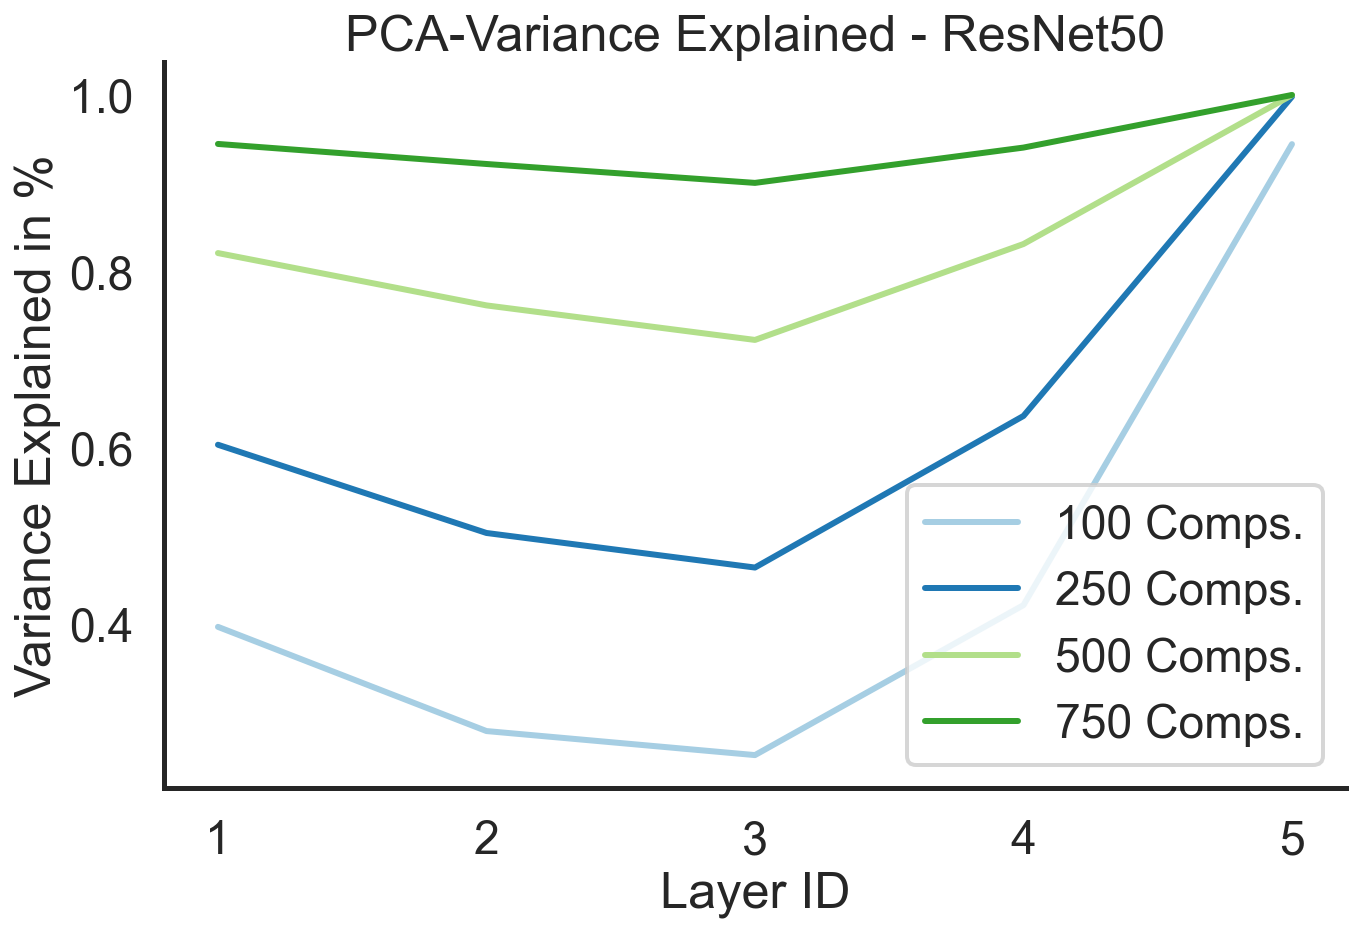

In [24]:
pca_100 = {'layer_1': {'explained_var': 0.39622963698447067},
           'layer_2': {'explained_var': 0.2779730936560019},
           'layer_3': {'explained_var': 0.2506851673724481},
           'layer_4': {'explained_var': 0.4209107612380861},
           'layer_5': {'explained_var': 0.9441720744025096}}

pca_250 = {'layer_1': {'explained_var': 0.6029562042789471},
           'layer_2': {'explained_var': 0.5028114493585244},
           'layer_3': {'explained_var': 0.4635729075704505},
           'layer_4': {'explained_var': 0.6356408715146987},
           'layer_5': {'explained_var': 0.9980577084376245}}

pca_500 = {'layer_1': {'explained_var': 0.8205344348809623},
           'layer_2': {'explained_var': 0.761140206784042},
           'layer_3': {'explained_var': 0.721941972061665},
           'layer_4': {'explained_var': 0.8307936812001775},
           'layer_5': {'explained_var': 0.9999168735087611}}

pca_750 = {'layer_1': {'explained_var': 0.9444003823958735},
           'layer_2': {'explained_var': 0.9216436258509637},
           'layer_3': {'explained_var': 0.9001997208156728},
           'layer_4': {'explained_var': 0.9402808202213787},
           'layer_5': {'explained_var': 0.9999953984370257}}


fig, ax = plt.subplots(figsize=(10, 7))
labels = ['100 Comps.', '250 Comps.', '500 Comps.', '750 Comps.']
for i, p in enumerate([pca_100, pca_250, pca_500, pca_750]):
    var = [p[k]["explained_var"] for k in p.keys()]
    ax.plot(np.arange(1, 6), var, label=labels[i])
ax.legend()
ax.set_xlabel("Layer ID")
ax.set_ylabel(r"Variance Explained in %")
ax.set_title("PCA-Variance Explained - ResNet50")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

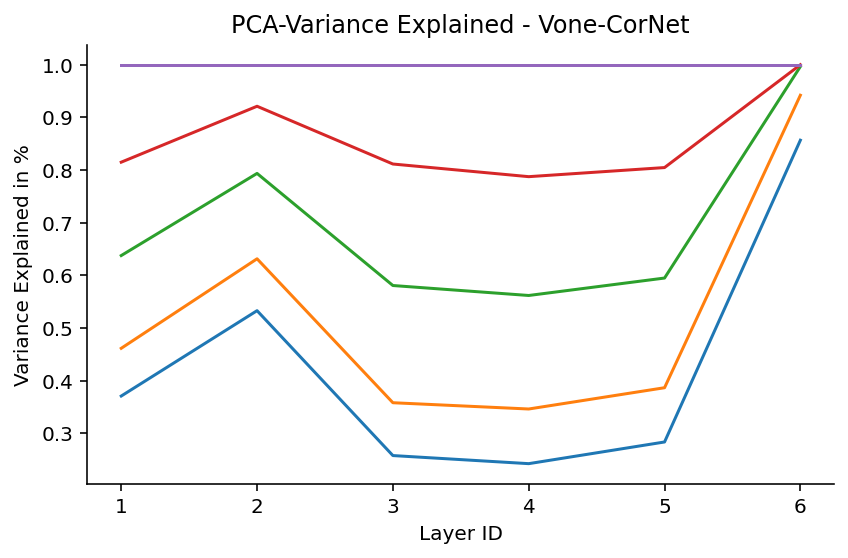

In [3]:
base_path = "../data/pca_variance/vone-cornets/"
var_exp_paths = [base_path + "50_pca_variance.npy",
                 base_path + "100_pca_variance.npy",
                 base_path + "250_pca_variance.npy",
                 base_path + "500_pca_variance.npy",
                 base_path + "1000_pca_variance.npy"]

fig, ax = plt.subplots()
for p in var_exp_paths:
    var = np.load(p)
    ax.plot(np.arange(1, len(var)+1), var)
ax.set_xlabel("Layer ID")
ax.set_ylabel(r"Variance Explained in %")
ax.set_title("PCA-Variance Explained - Vone-CorNet")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

# Load data for one layer

In [4]:
layer = "layer_8"
activations_dir = "../data/features/alexnet/activations"
activations_file_list = glob.glob(activations_dir +'/*' + layer + '.npy')
activations_file_list.sort()
feature_dim = np.load(activations_file_list[0]).shape[0]
x = np.zeros((len(activations_file_list),feature_dim))
for i, activation_file in enumerate(activations_file_list):
    temp = np.load(activation_file)
    x[i,:] = temp
x_train = x[:1000,:]
x_test = x[1000:]

x_test = StandardScaler().fit_transform(x_test)
x_train = StandardScaler().fit_transform(x_train)

# Autoencoder

# UMAP Algorithm

In [9]:
import umap

n_neighbors=15
min_dist=0.1
n_components=2
metric='euclidean'
dim_red = umap.UMAP(
    n_neighbors=n_neighbors,
    min_dist=min_dist,
    n_components=n_components,
    metric=metric
)

trafo = dim_red.fit(x_train)
trafo.transform(x_train)

array([[ 4.751922  ,  4.877557  ],
       [ 0.97960323,  3.285989  ],
       [ 2.4613802 ,  4.7664437 ],
       ...,
       [-1.0208783 ,  4.5721297 ],
       [ 0.51256174,  4.267113  ],
       [-1.2630869 ,  6.349248  ]], dtype=float32)

In [ ]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

# Explore Different Dim Reduction Techniques

In [ ]:
all_methods = ['standard', 'ltsa', 'hessian', 'modified']
n_components = 100
n_neighbors = 25

method = manifold.LocallyLinearEmbedding(method=all_methods[0],
                                         n_neighbors=n_neighbors,
                                         n_components=n_components,
                                         eigen_solver='auto')
method.fit(x_train)
method.transform(x_train).shape

In [ ]:
method.reconstruction_error_

In [ ]:
method = manifold.TSNE(n_components=100, init='pca',
                       random_state=0, perplexity=100,
                       method='exact')
method.fit_transform(x_train).shape

In [ ]:
method = manifold.Isomap(n_neighbors, n_components)
method = manifold.MDS(n_components, max_iter=100, n_init=1)
method = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors)